# Obligatorio - Machine Learning

### Universidad ORT

#### Alumnos : Felipe Bastarrica (158687), Aldo Gioda (XXXXXX), Esteban Maestro (XXXXXX)

## Library Installation

In [25]:
#!pip install wandb
#!pip install gradio
#!pip install tensorflow-model-optimization


SyntaxError: invalid syntax (166613794.py, line 3)

#### Detele images from folders

In [19]:
# Clean folders

!rm images/train/1/*
!rm images/validation/1/*
!rm images/train/0/*
!rm images/validation/0/*

# Create folders
!mkdir images
!mkdir images/train
!mkdir images/validation

!mkdir images/train/0/
!mkdir images/validation/0/

!mkdir images/train/1/
!mkdir images/validation/1/


mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘images/train’: File exists
mkdir: cannot create directory ‘images/validation’: File exists
mkdir: cannot create directory ‘images/train/0/’: File exists
mkdir: cannot create directory ‘images/validation/0/’: File exists
mkdir: cannot create directory ‘images/train/1/’: File exists
mkdir: cannot create directory ‘images/validation/1/’: File exists


### Blob Connection and log parser

In [2]:
import pandas as pd
import json
import numpy as np


from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

# Connection to Container
connection_string = "DefaultEndpointsProtocol=https;AccountName=cs210032001db9f06eb;AccountKey=Q7i41vK6zB2p/aKXulAdSROpoIou5uYj+EulJri7p9VI9VH4Us+Rlj+9fo5GC78TxSlPNQEWaDVY+AStDBpAfA==;EndpointSuffix=core.windows.net"
container_name = "container-ml"
blob_name = "properties_gallito.jl"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

# Replace commas for correct dataframe formation
csv_data2 = csv_data.replace(".jpg\",",".jpg\";").replace(", \"status\":","; \"status\":").replace(", {\"url\":", "; {\"url\":")

data = StringIO(csv_data2)
df = pd.read_csv(data, header=None, on_bad_lines='skip')

print(csv_data2)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [21]:
# Example of parsed images
df[7][0]

' "images": [{"url": "https://imagenes.gallito.com/1024x768/48931854.jpg"; "path": "full/0e040e8540402ac852cd676ef0fd88cb2f42c489.jpg"; "checksum": "36f868e1b1dfd5f8613ab70866eff078"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931855.jpg"; "path": "full/6b52d350a917976ba33dbbe3e92aa92abe0886c3.jpg"; "checksum": "fee765fbc56e992a8f6f55e42e184cfa"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931856.jpg"; "path": "full/0d98d020f7793c4f7446638a011aa5dd03197cd3.jpg"; "checksum": "738d5ef27711272f2571ee8eb4486e90"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931857.jpg"; "path": "full/2f8528d1b71540460d9237dcf1870412751d4093.jpg"; "checksum": "301cb3880553b5f3e60cec13e381d06e"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931858.jpg"; "path": "full/690de228ed7bbff8edd02f01a2942202c08d0e06.jpg"; "checksum": "7ee08eddedb2864d5737239dc514fbfb"; "status": "downloaded"}; {"url":

In [22]:
# Dataframe from properties file
df.head()

,0,1,2,3,4,5,6,7
0,"{""id"": ""23811743""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-exce...","""link"": ""https://www.gallito.com.uy/venta-exc...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
1,"{""id"": ""23839777""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casona-en-...","""link"": ""https://www.gallito.com.uy/casona-en...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
2,"{""id"": ""20670463""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
3,"{""id"": ""23062877""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casa-en-ti...","""link"": ""https://www.gallito.com.uy/casa-en-t...","""property_type"": ""HOUSE""","""property_rooms"": ""3D""","""images"": [{""url"": ""https://imagenes.gallito...."
4,"{""id"": ""23250204""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."


### List of blobs 

In [3]:
# Function creates array of all blobs from container that contain .jpg in their name
def list_blobs_flat(blob_service_client: BlobServiceClient, container_name):
    container_client = blob_service_client.get_container_client(container=container_name)
    array = []
    blob_list = container_client.list_blobs()

    for blob in blob_list:
        if (".jpg" in blob.name):
            array.append(blob.name)
    return array

url_imagenes = list_blobs_flat(blob_service_client,"container-ml")

# Obtain labels from names
def get_labels(array_of_names):
    array = []

    for path in array_of_names:
        array.append(path.split("_")[2])
    return array

array_labels =  get_labels(url_imagenes)


#### Plot distribution of classes

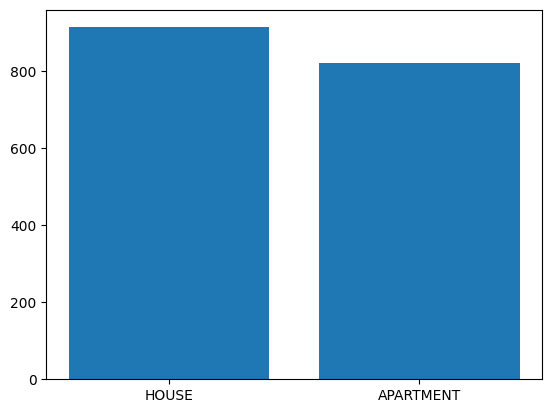

In [4]:
import matplotlib.pyplot as plt

count_classes = {"HOUSE":0, "APARTMENT":0}
for object in array_labels:
    count_classes[object] = count_classes[object] + 1 

classes = list(count_classes.keys())
values = list(count_classes.values())

plt.bar(range(len(count_classes)), values, tick_label=classes)
plt.show()

### Save images in Notebook folders

In [25]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import random

incr = 0
train_tabular_data = []
validation_tabular_data = []

for blobName in url_imagenes:
    incr += 1
    try:
        blob_service_client = BlobServiceClient.from_connection_string(conn_str=connection_string)
        blob_name = blobName
        blob_client = blob_service_client.get_blob_client(container_name, blob_name)

        stream = io.BytesIO()
        download_stream = blob_client.download_blob()

        stream.write(download_stream.readall())

        stream.seek(0)
        image = Image.open(stream)

        # Get information from URL
        id = (blobName.split("_")[0]).split("/")[1]
        tipo = blobName.split("_")[2]

        # Change traget to 0 and 1
        if (tipo == "HOUSE"):
            tipo = "0"
        else:
            tipo = "1"

        rooms = blobName.split("_")[3].split(".")[0]
        meters = blobName.split("_")[4].split("mts")[0]

        # Special case of "has" instead of mts
        if "has." in meters:
            meters = str(int(meters.split("has.")[0])*10000)

        # Sort partitions 80-20
        if random.uniform(0, 1) > 0.2:
            image.save("images/train/"+tipo+"/"+id+"_"+str(incr)+".jpg")
            train_tabular_data.append((rooms,meters,tipo))
        else:
            image.save("images/validation/"+tipo+"/"+id+"_"+str(incr)+".jpg")
            validation_tabular_data.append((rooms,meters,tipo))

    except Exception as ex:
        print('Exception:')



#### Save tabular data into CSVs

In [26]:
import csv 

train_tabular_data = np.array(train_tabular_data)
validation_tabular_data = np.array(validation_tabular_data)
headers = ["Cuartos","Meters","target"]

def write_csv(CSV_name, array, headers_csv):
    with open(CSV_name, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(headers_csv)
        for data in array:
            writer.writerow(data)
    
write_csv('csv_train.csv', train_tabular_data, headers)    
write_csv('csv_validation.csv', validation_tabular_data, headers)

#### Definitions

In [5]:
# Definitions
batch_size = 32
img_height = 180
img_width = 180
num_channels = 3
epochs = 30
steps_per_epoch = 30
validation_steps = 10
num_tabular_features = 2
class_names = ["HOUSE","APARTMENT"]
class_names_binary = ["0","1"]


### Plot images

In [19]:
import matplotlib.pyplot as plt
import glob, random
from tensorflow.keras.utils import load_img

for class_type in class_names_binary:
    print(class_type)
    i = 0
    for i in range(5):
        images = glob.glob("images/train/"+str(class_names_binary)+"/*.jpg")
        random_image = random.choice(images)

        # load the image
        img = load_img(random_image)

        plt.imshow(img)
        plt.figure(figsize=(2,2)) 
        i += 1
    plt.show()

0


<Figure size 640x480 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 0 Axes>

1


<Figure size 640x480 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 1 Axes>

<Figure size 200x200 with 0 Axes>

### Dataset Generation

##### Image dataset Generation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        vertical_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'images/validation',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical')

2023-06-18 13:04:04.180810: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 13:04:08.609492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 1396 images belonging to 2 classes.
Found 338 images belonging to 2 classes.


##### Tabular data processing

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file
data_train = pd.read_csv('csv_train.csv')
data_validation = pd.read_csv('csv_validation.csv')

data_train['Cuartos'] = data_train['Cuartos'].str.replace('D','')
data_train['Cuartos'] = data_train['Cuartos'].str.replace('+','')

data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('D','')
data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('+','')

# Split into features and target
X_train = data_train.drop('target', axis=1).astype(float).to_numpy()
y_train = data_train.iloc[:,-1].astype(float).to_numpy().reshape(-1, 1)
X_test = data_validation.drop('target', axis=1).astype(float).to_numpy()
y_test = data_validation.iloc[:,-1].astype(float).to_numpy().reshape(-1, 1)

In [8]:
# Concatenate batches of images
train_generator_concatenated=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
validation_generator_concatenated=np.concatenate([validation_generator.next()[0] for i in range(validation_generator.__len__())])

In [9]:
# Transform targets to categorical objects
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

### Model Definition

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

image_input = Input(shape=(img_height, img_width, num_channels))
conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
batch1 = BatchNormalization()(pool1)
conv2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
batch2 = BatchNormalization()(pool2)
flatten = Flatten()(batch2)
drop1 = Dropout(rate = 0.4)(flatten)
image_features = Dense(128, activation='relu')(drop1)

# Tabular Data Processing Branch
tabular_input = Input(shape=(num_tabular_features,))
dense1 = Dense(128, activation='relu')(tabular_input)
drop2 = Dropout(rate = 0.4)(dense1)
tabular_features = Dense(64, activation='relu')(drop2)

# Fusion Layer
concatenated = Concatenate()([image_features, tabular_features])
drop3 = Dropout(rate = 0.4)(concatenated)
fusion_layer = Dense(192, activation='relu')(drop3)

# Output Layer
output = Dense(2, activation='softmax')(fusion_layer)

# Create the model
model = Model(inputs=[image_input, tabular_input], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 178, 178, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 89, 89, 64)   0           ['conv2d[0][0]']                 
                                                                                              

### Model compilation

Ejecución del modelo para primeras pruebas, con el objetivo de poder llegar a obtener un modelo que pueda utilizar los datos de imágenes y los datos tabulares procesados previamente.

In [14]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Execution of model

history = model.fit(x=[train_generator_concatenated, X_train], y=y_train, 
                        steps_per_epoch=steps_per_epoch,
                        epochs=10, 
                        validation_data=([validation_generator_concatenated, X_test], y_test), 
                        validation_steps = validation_steps)

Epoch 1/10
30/30 [==============================] - 42s 1s/step - loss: 2.5292 - accuracy: 0.6884 - val_loss: 0.9341 - val_accuracy: 0.6982
Epoch 2/10
30/30 [==============================] - 40s 1s/step - loss: 0.9510 - accuracy: 0.7271 - val_loss: 2.0043 - val_accuracy: 0.5000
Epoch 3/10
30/30 [==============================] - 40s 1s/step - loss: 0.8599 - accuracy: 0.7264 - val_loss: 1.1260 - val_accuracy: 0.6420
Epoch 4/10
30/30 [==============================] - 40s 1s/step - loss: 0.6333 - accuracy: 0.7607 - val_loss: 1.8574 - val_accuracy: 0.5444
Epoch 5/10
30/30 [==============================] - 40s 1s/step - loss: 0.5385 - accuracy: 0.7901 - val_loss: 0.7507 - val_accuracy: 0.6568
Epoch 6/10
30/30 [==============================] - 40s 1s/step - loss: 0.4203 - accuracy: 0.8288 - val_loss: 1.2495 - val_accuracy: 0.6095
Epoch 7/10
30/30 [==============================] - 40s 1s/step - loss: 0.3750 - accuracy: 0.8582 - val_loss: 0.9120 - val_accuracy: 0.6598
Epoch 8/10
30/30 [==

## WANDB

In [33]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import wandb
from wandb.keras import WandbCallback

# Account Key
wandb.login(key="bb15b17a6eb09e20bb877cebbceb375ade025b37")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/azureuser/.netrc


True

In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
from tensorflow_model_optimization.sparsity import keras as sparsity

model_history = []

# Launch 2 experiments, trying different dropout rates
for run in range(2):
    
    # Start a run, tracking hyperparameters
    wandb.init(
        project="ml-en-produccion",
        config={
        
            #"activation_1": "relu",
            "img_height": 180,
            "img_width": 180,
            "dropout": random.uniform(0.01, 0.80),
            "optimizer": "adam",
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 5,
            "batch_size": 32,
            "steps_per_epoch":30,
            "validation_steps":10
        },
    )
    config = wandb.config
    

    # Define tu modelo
    
    image_input = Input(shape=(img_height, img_width, num_channels))
    conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(image_input)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    flatten = Flatten()(pool2)
    image_features = Dense(128, activation='relu')(flatten)

    # Tabular Data Processing Branch
    tabular_input = Input(shape=(num_tabular_features,))
    tabular_features = Dense(64, activation='relu')(tabular_input)

    # Fusion Layer
    concatenated = Concatenate()([image_features, tabular_features])
    fusion_layer = Dense(64, activation='relu')(concatenated)

    # Output layer
    output = Dense(2, activation='softmax')(fusion_layer)
    # Create the model
    model = Model(inputs=[image_input, tabular_input], outputs=output)
    # Compila y entrena el modelo
    model.compile(optimizer=config.optimizer, loss=config.loss,  metrics=[config.metric])

    # Early toppong
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


    # Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints
    wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
    '''
    history = model.fit(x=[train_generator_concatenated, X_train], y=y_train, 
                        steps_per_epoch=config.steps_per_epoch,
                        epochs=config.epoch, 
                        validation_data=([validation_generator_concatenated, X_test], y_test), 
                        validation_steps = config.validation_steps,
                        callbacks=[wandb_callbacks,earlystopping_callback])
    '''
    # Definir el esquema de pruning. En este caso, comenzamos sin pruning y terminamos con el 50% de los pesos pruned. 
    # El pruning comienza en el paso 2000 y termina en el paso 4000.
    pruning_params = {
        'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.0,
                                                    final_sparsity=0.5,
                                                    begin_step=200,
                                                    end_step=400)
    }

    # Envolver el modelo con las capas de pruning. Esto agregará una operación de pruning a cada capa de nuestro modelo.
    model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)

    # Necesitamos recompilar el modelo después de agregar las capas de pruning.
    model_for_pruning.compile(optimizer='adam', 
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

    # Entrenar el modelo con callbacks para habilitar pruning. 
    # El callback UpdatePruningStep asegurará que el estado del pruning se actualiza en cada paso de entrenamiento.
    pruning_callbacks = [
    sparsity.UpdatePruningStep(),
    ]
    history = model_for_pruning.fit(x=[train_generator_concatenated, X_train], y=y_train, 
                        steps_per_epoch=config.steps_per_epoch,
                        epochs=config.epoch, 
                        validation_data=([validation_generator_concatenated, X_test], y_test), 
                        validation_steps = config.validation_steps,
                        callbacks=[wandb_callbacks,earlystopping_callback, pruning_callbacks])

    model_history.append(history)

    wandb.finish()

Epoch 1/5
30/30 [==============================] - ETA: 0s - loss: 1.0204 - accuracy: 0.7514

INFO:tensorflow:Assets written to: my_model_01/assets


INFO:tensorflow:Assets written to: my_model_01/assets
wandb: Adding directory to artifact (./my_model_01)... Done. 9.7s


30/30 [==============================] - 66s 2s/step - loss: 1.0204 - accuracy: 0.7514 - val_loss: 0.5555 - val_accuracy: 0.7308
Epoch 2/5
30/30 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.7851

INFO:tensorflow:Assets written to: my_model_02/assets


INFO:tensorflow:Assets written to: my_model_02/assets
wandb: Adding directory to artifact (./my_model_02)... Done. 9.5s


30/30 [==============================] - 66s 2s/step - loss: 0.4781 - accuracy: 0.7851 - val_loss: 0.4751 - val_accuracy: 0.7692
Epoch 3/5
30/30 [==============================] - ETA: 0s - loss: 0.4717 - accuracy: 0.7650

INFO:tensorflow:Assets written to: my_model_03/assets


INFO:tensorflow:Assets written to: my_model_03/assets
wandb: Adding directory to artifact (./my_model_03)... Done. 11.2s


30/30 [==============================] - 59s 2s/step - loss: 0.4717 - accuracy: 0.7650 - val_loss: 0.4915 - val_accuracy: 0.7751
Epoch 4/5
30/30 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8202

INFO:tensorflow:Assets written to: my_model_04/assets


INFO:tensorflow:Assets written to: my_model_04/assets
wandb: Adding directory to artifact (./my_model_04)... Done. 9.0s


30/30 [==============================] - 56s 2s/step - loss: 0.4160 - accuracy: 0.8202 - val_loss: 0.5295 - val_accuracy: 0.7692
Epoch 5/5
30/30 [==============================] - ETA: 0s - loss: 0.3200 - accuracy: 0.8689

INFO:tensorflow:Assets written to: my_model_05/assets


INFO:tensorflow:Assets written to: my_model_05/assets
wandb: Adding directory to artifact (./my_model_05)... Done. 9.9s


30/30 [==============================] - 58s 2s/step - loss: 0.3200 - accuracy: 0.8689 - val_loss: 0.6027 - val_accuracy: 0.7160


epoch/accuracy,▁▃▂▅█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▃▂▁
epoch/val_accuracy,▃▇█▇▁
epoch/val_loss,▅▁▂▄█
epoch/accuracy,0.86891
epoch/epoch,4
epoch/learning_rate,0.001
epoch/loss,0.32004
epoch/val_accuracy,0.71598


Epoch 1/5
30/30 [==============================] - ETA: 0s - loss: 4.4790 - accuracy: 0.7421

INFO:tensorflow:Assets written to: my_model_01/assets


INFO:tensorflow:Assets written to: my_model_01/assets
wandb: Adding directory to artifact (./my_model_01)... Done. 8.5s


30/30 [==============================] - 64s 2s/step - loss: 4.4790 - accuracy: 0.7421 - val_loss: 0.6882 - val_accuracy: 0.6479
Epoch 2/5
30/30 [==============================] - ETA: 0s - loss: 0.7464 - accuracy: 0.7457

INFO:tensorflow:Assets written to: my_model_02/assets


INFO:tensorflow:Assets written to: my_model_02/assets
wandb: Adding directory to artifact (./my_model_02)... Done. 8.7s


30/30 [==============================] - 60s 2s/step - loss: 0.7464 - accuracy: 0.7457 - val_loss: 0.5496 - val_accuracy: 0.7633
Epoch 3/5
30/30 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.7622

INFO:tensorflow:Assets written to: my_model_03/assets


INFO:tensorflow:Assets written to: my_model_03/assets
wandb: Adding directory to artifact (./my_model_03)... Done. 9.7s


30/30 [==============================] - 57s 2s/step - loss: 0.5593 - accuracy: 0.7622 - val_loss: 0.4801 - val_accuracy: 0.7426
Epoch 4/5
30/30 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.7729

INFO:tensorflow:Assets written to: my_model_04/assets


INFO:tensorflow:Assets written to: my_model_04/assets
wandb: Adding directory to artifact (./my_model_04)... Done. 10.2s


30/30 [==============================] - 59s 2s/step - loss: 0.4944 - accuracy: 0.7729 - val_loss: 0.4877 - val_accuracy: 0.7663
Epoch 5/5
30/30 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.7572

INFO:tensorflow:Assets written to: my_model_05/assets


INFO:tensorflow:Assets written to: my_model_05/assets
wandb: Adding directory to artifact (./my_model_05)... Done. 8.9s


30/30 [==============================] - 59s 2s/step - loss: 0.5035 - accuracy: 0.7572 - val_loss: 0.8636 - val_accuracy: 0.7012


epoch/accuracy,▁▂▆█▄
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▁▁▁▁
epoch/val_accuracy,▁█▇█▄
epoch/val_loss,▅▂▁▁█
epoch/accuracy,0.75716
epoch/epoch,4
epoch/learning_rate,0.001
epoch/loss,0.50351
epoch/val_accuracy,0.70118


### Plot metrics

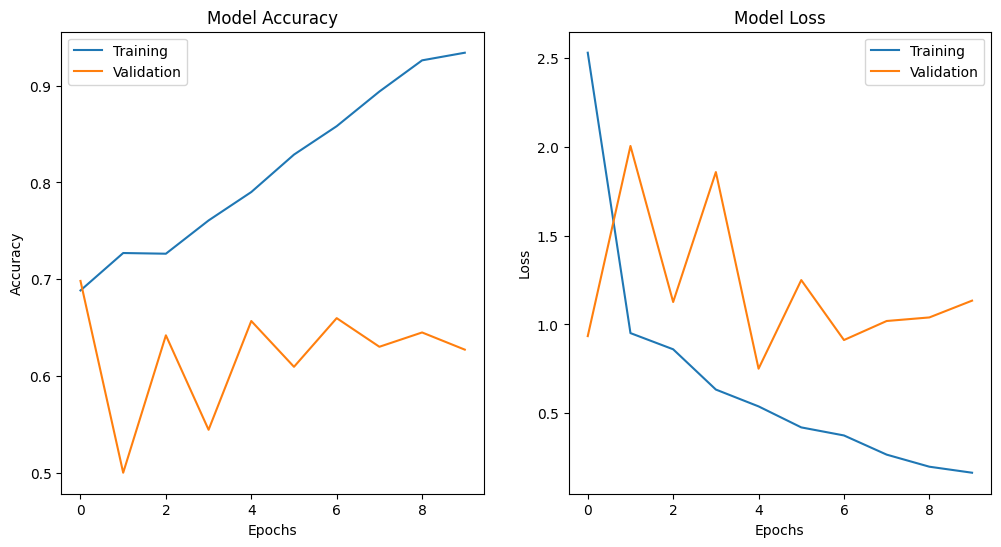

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
plot_history(history)

# Save the trained model
model.save('conv_categorical_imgtab.h5')

In [17]:
# For testing, convert image to tensor and add dimension in first position
def input_conversion (image, tabular):
    tensor_img = tf.convert_to_tensor(image)
    tensor_tab = tf.convert_to_tensor(tabular)
    tensor_img = tf.expand_dims(tensor_img, 0)
    tensor_tab = tf.expand_dims(tensor_tab, 0)
    return tensor_img,tensor_tab

tensor_img, tensor_tab = input_conversion (validation_generator_concatenated[2], X_test[2])


In [19]:
# Make a simple prediction
prediction = model.predict(tensor_img)
print (prediction)

ValueError: in user code:

    File "/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/keras/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 180, 180, 3) dtype=float32>]


### Gradio

In [1]:
import numpy as np

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('conv_categorical.h5')

def classify_image(image, rooms, meters):
    image = np.expand_dims(image, axis=0)
    tabular = np.expand_dims([rooms,meters], axis=0).astype(float)
    print(image.shape)
    print(tabular.shape)
    prediction = model.predict([image,tabular])

    # Obtiene las etiquetas de las clases
    class_labels = ['HOUSE','APARTMENT']
    # Devuelve un diccionario con las etiquetas de las clases y sus probabilidades correspondientes
    return {class_labels[i]: float(prediction[0][i]) for i in range(2)}
    #return prediction[0]

2023-06-18 11:46:40.451715: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 11:46:44.805456: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-18 11:46:53.196200: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
import gradio as gr

iface = gr.Interface(
    fn=classify_image,  # la función que hace la clasificación
    inputs=[gr.inputs.Image(shape=(img_height, img_width)), gr.inputs.Slider(0,5,label="Dormitorios", step=1), gr.inputs.Slider(0,5000,label="M2")],#,"text", "text"],#, gr.inputs.Slider(0,5,label="Dormitorios"), gr.inputs.Slider(0,5000,label="M2")],  # el tipo de entrada que espera tu modelo
    outputs=gr.outputs.Label(num_top_classes=2),  # el tipo de salida que produce tu modelo
)
iface.launch(share=True, debug=True)

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported i

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://e1cdcd89300f0447d3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


(1, 180, 180, 3)
(1, 2)
1/1 [==============================] - 1s 904ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e1cdcd89300f0447d3.gradio.live
